In [1]:
import numpy as np
import matplotlib.pylab as plot
import math
import fit_functions
import fit_lc

In [2]:
#t=np.logspace(0.1,3,100)
lc=fit_lc.read_lc('../GRBs/GRB050502B/')
t=np.array(lc['Time'])

In [25]:
xflares=np.array([700.,3e4,8e4])
yflares=np.array([70,0.03,0.05])
t2=50   # bigger number = wider/shallower decay
#ts=-10   # must be negative (>-10)
#t1=(xflares-ts)**2/t2
t1=5000
#tpeak=ts+sqrt(t1*t2)
ts=xflares-np.sqrt(t1*t2)
pflares=np.array([yflares[0],ts[0],t1,t2,yflares[1],ts[1],t1,t2,yflares[2],ts[1],t1,t2])
print pflares#A,ts,t1,t2

[  7.00000000e+01   2.00000000e+02   5.00000000e+03   5.00000000e+01
   3.00000000e-02   2.95000000e+04   5.00000000e+03   5.00000000e+01
   5.00000000e-02   2.95000000e+04   5.00000000e+03   5.00000000e+01]


[  3.00000000e+02   1.00000000e+00   7.00000000e+01   2.00000000e+02
   5.00000000e+03   5.00000000e+01   3.00000000e-02   2.95000000e+04
   5.00000000e+03   5.00000000e+01   5.00000000e-02   2.95000000e+04
   5.00000000e+03   5.00000000e+01]


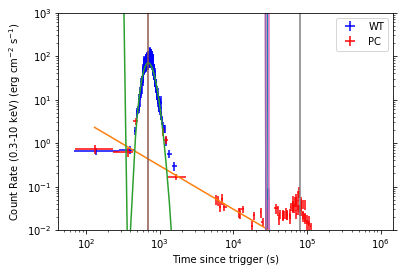

In [26]:
plot.figure()
p=np.append([300,1],pflares)#,A,ts,t1,t2]
print p
fit_lc.plot_lcfit(lc=lc,noshow=True)
y=fit_functions.Norris3_pow(t,*p)
plot.plot(t,y)
plot.plot(t,fit_functions.pow(t,*p[0:2]))
plot.plot(t,fit_functions.Norris(t,*p[2:6]))
plot.plot(t,fit_functions.Norris(t,*p[6:10]))
plot.plot(t,fit_functions.Norris(t,*p[10:14]))
[plot.plot([xf,xf],[1e-4,1e10]) for xf in xflares]
plot.xscale('log')
plot.yscale('log')
plot.ylim([1e-2,1e3])
plot.show()